# Prediction of survival

In [1]:
!nvidia-smi

Sun Apr  7 10:40:48 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

## Imports

In [75]:
!pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.5/841.5 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 44.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 58.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 66.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

In [78]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from torchmetrics import Accuracy

import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [100]:
df = pd.read_csv('train.csv')
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
1,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
2,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
3,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
4,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,52.0,0,190,1,38,0,382000.00,1.0,140,1,1,258,0
245,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
246,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
247,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0


In [101]:
x_set = df.drop('DEATH_EVENT', axis=1)
y_set = df['DEATH_EVENT']

In [102]:
x_set, y_set

(      age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
 0    55.0        0                      7861         0                 38   
 1    65.0        0                       146         0                 20   
 2    50.0        1                       111         0                 20   
 3    65.0        1                       160         1                 20   
 4    75.0        1                       246         0                 15   
 ..    ...      ...                       ...       ...                ...   
 244  52.0        0                       190         1                 38   
 245  62.0        0                        61         1                 38   
 246  55.0        0                      1820         0                 38   
 247  45.0        0                      2060         1                 60   
 248  50.0        0                       196         0                 45   
 
      high_blood_pressure  platelets  serum_creatinine  serum_

In [103]:
x_set.shape, y_set.shape

((249, 12), (249,))

## Check the Missing values

In [49]:
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

## Train test split

In [104]:
x_train, x_valid, y_train, y_valid = train_test_split(x_set, y_set, test_size=0.2, random_state=42)

x_train.shape, y_train.shape, x_valid.shape, y_valid.shape

((199, 12), (199,), (50, 12), (50,))

## Correlation

In [51]:
corr = df.corr()
corr

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.054764,-0.024032,-0.072918,0.047191,0.131942,-0.068774,0.152470,-0.043350,0.072767,0.031060,-0.209515,0.273166
anaemia,0.054764,1.000000,-0.193782,-0.002417,0.012755,0.046177,-0.038459,0.055019,0.002529,-0.072980,-0.104796,-0.172416,0.088886
creatinine_phosphokinase,-0.024032,-0.193782,1.000000,-0.050247,-0.017335,-0.116241,0.034279,-0.007902,0.045898,0.074965,0.025238,-0.004679,0.031485
diabetes,-0.072918,-0.002417,-0.050247,1.000000,-0.025333,-0.013917,0.037785,-0.046824,-0.117200,-0.183790,-0.189621,0.014366,0.005338
ejection_fraction,0.047191,0.012755,-0.017335,-0.025333,1.000000,0.067894,0.076578,-0.031433,0.216576,-0.119783,-0.023697,0.032328,-0.268376
high_blood_pressure,0.131942,0.046177,-0.116241,-0.013917,0.067894,1.000000,0.055143,0.027728,0.027281,-0.110194,-0.099002,-0.160574,0.044843
platelets,-0.068774,-0.038459,0.034279,0.037785,0.076578,0.055143,1.000000,-0.059039,0.065283,-0.171090,0.041607,0.043783,-0.063508
serum_creatinine,0.152470,0.055019,-0.007902,-0.046824,-0.031433,0.027728,-0.059039,1.000000,-0.156269,-0.005009,-0.016431,-0.137417,0.326138
serum_sodium,-0.043350,0.002529,0.045898,-0.117200,0.216576,0.027281,0.065283,-0.156269,1.000000,-0.014643,0.003938,0.089756,-0.256762
sex,0.072767,-0.072980,0.074965,-0.183790,-0.119783,-0.110194,-0.171090,-0.005009,-0.014643,1.000000,0.463185,-0.026182,-0.021182


<Axes: >

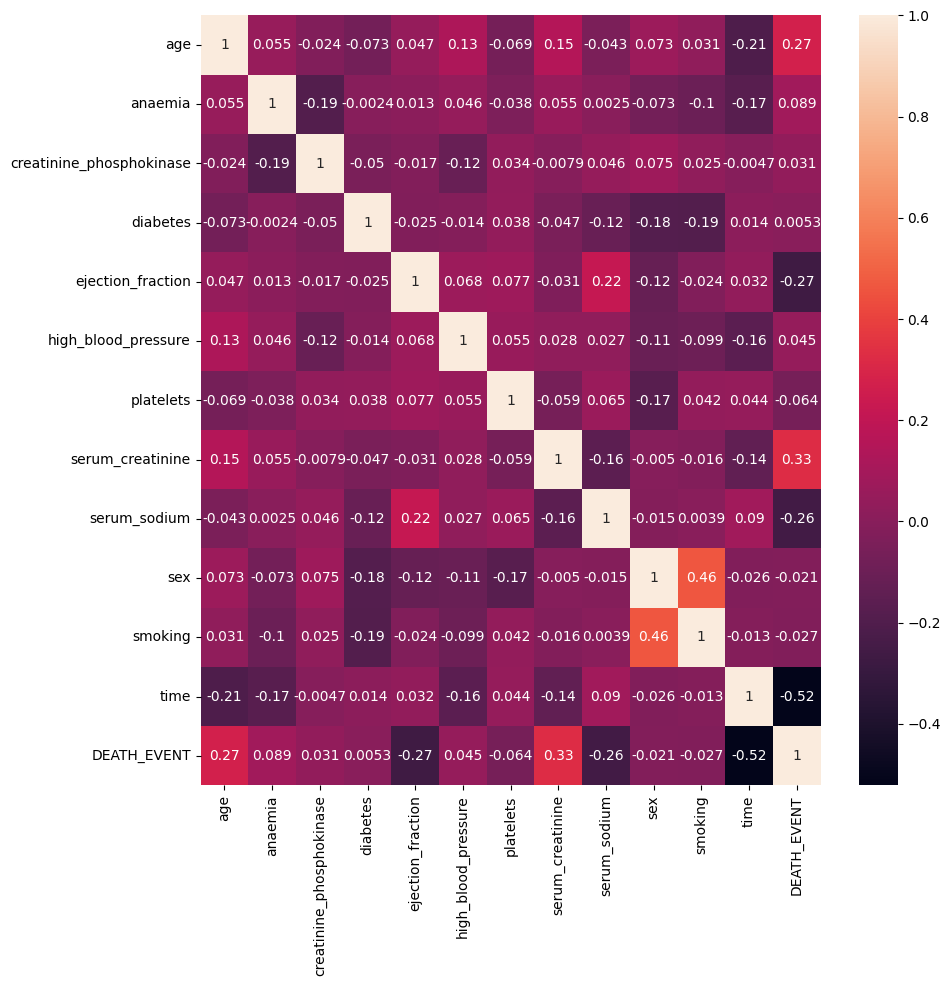

In [52]:
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True)

## EDA

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'anaemia'}>,
        <Axes: title={'center': 'creatinine_phosphokinase'}>,
        <Axes: title={'center': 'diabetes'}>],
       [<Axes: title={'center': 'ejection_fraction'}>,
        <Axes: title={'center': 'high_blood_pressure'}>,
        <Axes: title={'center': 'platelets'}>,
        <Axes: title={'center': 'serum_creatinine'}>],
       [<Axes: title={'center': 'serum_sodium'}>,
        <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'smoking'}>,
        <Axes: title={'center': 'time'}>],
       [<Axes: title={'center': 'DEATH_EVENT'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

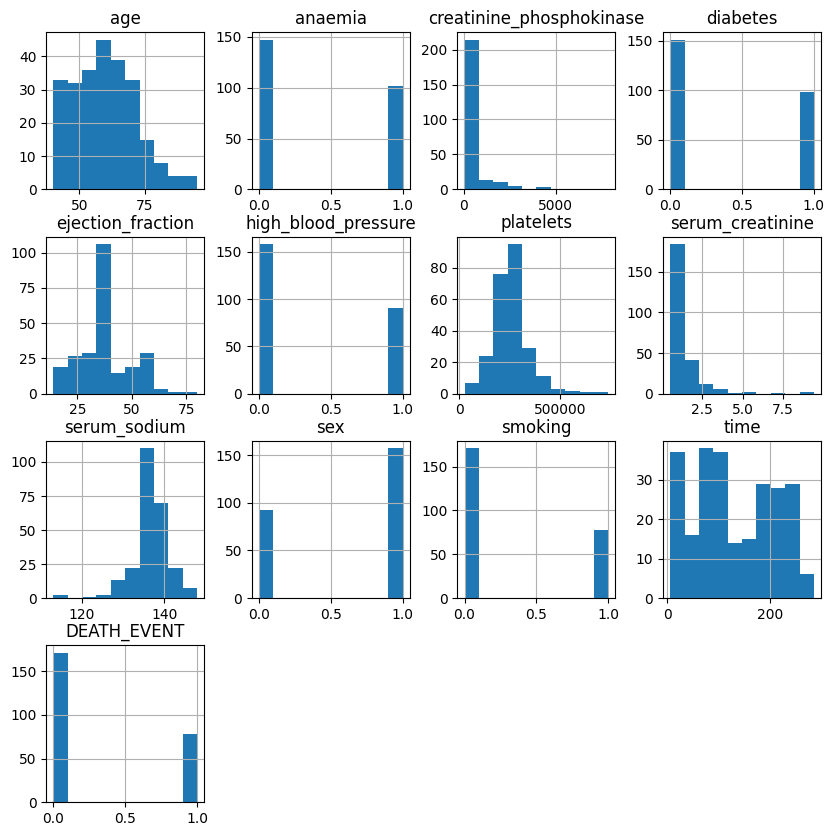

In [17]:
df.hist(figsize=(10, 10))

In [18]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

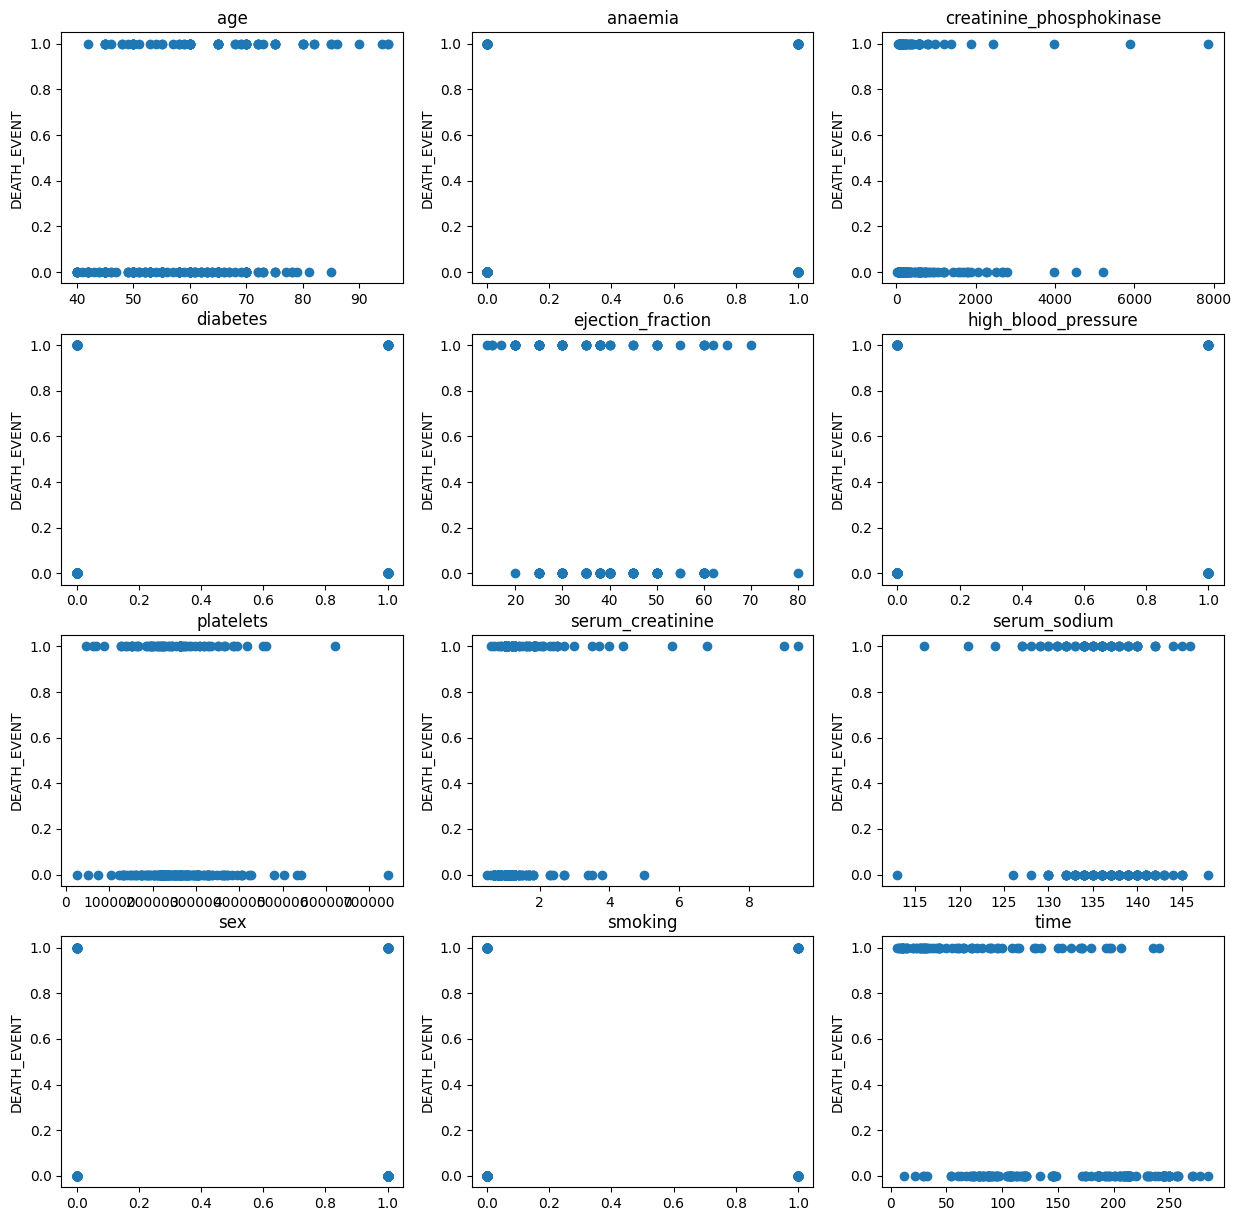

In [21]:
columns = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']

fig, axes = plt.subplots(4, 3, figsize=(15, 15))
axes_flatten = axes.flatten()

for i, col in enumerate(columns):
  ax = axes_flatten[i]
  ax.scatter(df[col], df['DEATH_EVENT'])
  ax.set_title(col)
  ax.set_ylabel('DEATH_EVENT')

## Convert to tensor

In [105]:
x_train = torch.FloatTensor(x_train.values)
y_train = torch.FloatTensor(y_train.values)

x_valid = torch.FloatTensor(x_valid.values)
y_valid = torch.FloatTensor(y_valid.values)

## Standardization

In [106]:
mu = x_train.mean(dim=0)
std = x_train.std(dim=0)

mu, std

(tensor([5.9621e+01, 3.8191e-01, 5.7404e+02, 3.8191e-01, 3.7774e+01, 3.6181e-01,
         2.5571e+05, 1.3656e+00, 1.3652e+02, 6.5327e-01, 3.2663e-01, 1.3182e+02]),
 tensor([1.1176e+01, 4.8708e-01, 9.5891e+02, 4.8708e-01, 1.1973e+01, 4.8174e-01,
         8.9907e+04, 1.0280e+00, 4.2851e+00, 4.7713e-01, 4.7016e-01, 7.6886e+01]))

In [107]:
x_train = (x_train - mu) / std
x_valid = (x_valid - mu) / std

In [108]:
x_valid

tensor([[ 1.8235, -0.7841,  0.2106,  1.2690,  0.0189,  1.3248, -0.7086, -0.0638,
         -0.3553, -1.3692, -0.6947, -0.0237],
        [ 0.4813, -0.7841, -0.4349, -0.7841,  2.2740, -0.7511,  0.0851,  0.1307,
          0.3448, -1.3692, -0.6947, -1.5844],
        [ 0.0339,  1.2690, -0.4985,  1.2690,  1.8564,  1.3248,  0.1701, -0.6475,
         -0.1220, -1.3692, -0.6947, -0.4919],
        [ 0.4813, -0.7841, -0.3650,  1.2690,  1.0212, -0.7511, -1.1869, -0.0638,
          0.1114,  0.7267,  1.4322, -0.7780],
        [ 1.9129, -0.7841,  4.1359, -0.7841, -0.2317, -0.7511, -0.2748, -0.1806,
          0.1114,  0.7267,  1.4322, -0.3228],
        [-0.5030,  1.2690, -0.1533, -0.7841,  2.6916,  1.3248, -1.1646,  7.4267,
          0.1114, -1.3692, -0.6947,  0.8348],
        [ 1.3761, -0.7841, -0.4745, -0.7841,  1.0212,  1.3248, -0.0857, -0.2584,
          2.6785,  0.7267, -0.6947,  1.0038],
        [ 0.4813, -0.7841, -0.4756, -0.7841,  1.0212, -0.7511, -0.6864, -0.2584,
          1.9784,  0.7267,  1.

## DataLoader

In [109]:
train_data = TensorDataset(x_train, y_train)
train_data

In [110]:
train_data.tensors

(tensor([[-0.8609, -0.7841, -0.3379,  ...,  0.7267,  1.4322, -0.1537],
         [ 0.0936,  1.2690, -0.4412,  ..., -1.3692, -0.6947,  0.5226],
         [ 0.4813, -0.7841, -0.2587,  ..., -1.3692, -0.6947,  1.1469],
         ...,
         [-0.4135, -0.7841, -0.5361,  ...,  0.7267,  1.4322, -0.5439],
         [ 0.9287, -0.7841,  0.6549,  ..., -1.3692, -0.6947,  0.8348],
         [ 0.0339, -0.7841, -0.4985,  ..., -1.3692, -0.6947, -0.4789]]),
 tensor([0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0.,
         0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
         0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0.,
         0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1.,
         0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.,

In [111]:
valid_data = TensorDataset(x_valid, y_valid)
valid_data

In [112]:
valid_data.tensors

(tensor([[ 1.8235, -0.7841,  0.2106,  1.2690,  0.0189,  1.3248, -0.7086, -0.0638,
          -0.3553, -1.3692, -0.6947, -0.0237],
         [ 0.4813, -0.7841, -0.4349, -0.7841,  2.2740, -0.7511,  0.0851,  0.1307,
           0.3448, -1.3692, -0.6947, -1.5844],
         [ 0.0339,  1.2690, -0.4985,  1.2690,  1.8564,  1.3248,  0.1701, -0.6475,
          -0.1220, -1.3692, -0.6947, -0.4919],
         [ 0.4813, -0.7841, -0.3650,  1.2690,  1.0212, -0.7511, -1.1869, -0.0638,
           0.1114,  0.7267,  1.4322, -0.7780],
         [ 1.9129, -0.7841,  4.1359, -0.7841, -0.2317, -0.7511, -0.2748, -0.1806,
           0.1114,  0.7267,  1.4322, -0.3228],
         [-0.5030,  1.2690, -0.1533, -0.7841,  2.6916,  1.3248, -1.1646,  7.4267,
           0.1114, -1.3692, -0.6947,  0.8348],
         [ 1.3761, -0.7841, -0.4745, -0.7841,  1.0212,  1.3248, -0.0857, -0.2584,
           2.6785,  0.7267, -0.6947,  1.0038],
         [ 0.4813, -0.7841, -0.4756, -0.7841,  1.0212, -0.7511, -0.6864, -0.2584,
           1.97

In [113]:
train_loader = DataLoader(train_data, batch_size=4, shuffle=True)
train_loader

In [114]:
len(train_loader)

50

In [115]:
next(iter(train_loader))

[tensor([[-1.5767, -0.7841,  0.0083, -0.7841,  1.8564, -0.7511,  0.0851, -0.1806,
           0.1114, -1.3692, -0.6947, -0.6480],
         [ 1.1971,  1.2690, -0.3577,  1.2690, -0.6493, -0.7511, -1.0645, -0.1806,
           1.2782,  0.7267,  1.4322,  0.6267],
         [-0.5925, -0.7841, -0.3828,  1.2690,  0.1859, -0.7511, -0.3638, -0.1611,
          -1.5222, -1.3692, -0.6947,  1.0689],
         [-0.8609, -0.7841,  0.0083,  1.2690,  0.0189, -0.7511,  0.6039,  0.5198,
          -0.3553,  0.7267,  1.4322, -1.2593]]),
 tensor([0., 0., 0., 1.])]

In [116]:
valid_loader = DataLoader(valid_data, batch_size=4, shuffle=False)
valid_loader

In [117]:
len(valid_loader)

13

In [118]:
next(iter(valid_loader))

[tensor([[ 1.8235, -0.7841,  0.2106,  1.2690,  0.0189,  1.3248, -0.7086, -0.0638,
          -0.3553, -1.3692, -0.6947, -0.0237],
         [ 0.4813, -0.7841, -0.4349, -0.7841,  2.2740, -0.7511,  0.0851,  0.1307,
           0.3448, -1.3692, -0.6947, -1.5844],
         [ 0.0339,  1.2690, -0.4985,  1.2690,  1.8564,  1.3248,  0.1701, -0.6475,
          -0.1220, -1.3692, -0.6947, -0.4919],
         [ 0.4813, -0.7841, -0.3650,  1.2690,  1.0212, -0.7511, -1.1869, -0.0638,
           0.1114,  0.7267,  1.4322, -0.7780]]),
 tensor([1., 1., 0., 0.])]

## Model

In [162]:
num_features = 12
h1 = 64
h2 = 32

model = nn.Sequential(nn.Linear(num_features, h1),
                      nn.ReLU(),
                      nn.Linear(h1, h2),
                      nn.ReLU(),
                      nn.Linear(h2, 1),
                      nn.Sigmoid())

In [163]:
for p in model.parameters():
  print(p)

Parameter containing:
tensor([[ 2.3750e-02,  3.3072e-02,  2.0281e-02, -1.4850e-01,  2.3375e-01,
          5.5334e-02, -2.4161e-01, -1.4195e-01, -2.0430e-01,  3.7160e-02,
         -2.3206e-01, -1.9987e-02],
        [ 1.8168e-01,  1.3679e-01, -2.0753e-02,  1.9839e-01,  2.0951e-01,
         -2.1647e-01,  2.0167e-01,  2.7417e-01,  2.8089e-01, -1.6626e-01,
          2.5305e-01, -2.6641e-01],
        [ 1.7078e-01,  1.2884e-01,  1.9149e-02,  1.0362e-01,  2.0401e-01,
          2.1807e-01,  1.7353e-01, -1.3736e-01, -1.1980e-01, -1.0917e-01,
         -2.8470e-01, -5.4267e-02],
        [ 1.2647e-01, -1.4341e-01, -1.2192e-01, -1.6507e-01,  2.3320e-01,
          2.1709e-01, -2.5945e-01,  9.8732e-02,  2.4475e-01,  6.4477e-03,
         -1.8689e-01, -1.7331e-01],
        [-1.5580e-01,  9.3234e-02,  2.0821e-01, -1.9660e-01,  2.5266e-01,
          1.6659e-01,  1.9619e-01, -1.6015e-01, -1.2403e-01,  5.4889e-02,
         -7.5492e-02,  7.1965e-02],
        [-2.0627e-02, -6.5694e-02, -2.5143e-01, -7.1053e-0

## Loss & Optimizer

In [164]:
loss_fn = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

## Device

In [165]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [166]:
model = model.to(device)

## Utils

### Loss

In [74]:
class AverageMeter(object):
    """Computes and stores the average and current value"""
    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count

## Train the model

In [167]:
num_epochs = 50

train_loss_hist = []
valid_loss_hist = []

train_acc_hist = []
valid_acc_hist = []

since = time.time()

for epoch in range(num_epochs):

  train_loss = AverageMeter()
  train_acc = Accuracy(task='binary').to(device)

  for i, (inputs, targets) in enumerate(train_loader):

    inputs = inputs.to(device)
    targets = targets.to(device)

    outputs = model(inputs)
    loss = loss_fn(outputs.squeeze(), targets)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    train_loss.update(loss.item())
    train_acc(outputs.squeeze(), targets)

  with torch.no_grad():

    valid_loss = AverageMeter()
    valid_acc = Accuracy(task='binary').to(device)
    for i, (inputs, targets) in enumerate(valid_loader):

      inputs = inputs.to(device)
      targets = targets.to(device)

      outputs = model(inputs)
      loss = loss_fn(outputs.squeeze(), targets)

      valid_loss.update(loss.item())
      valid_acc(outputs.squeeze(), targets)

  train_loss_hist.append(train_loss.avg)
  valid_loss_hist.append(valid_loss.avg)
  train_acc_hist.append(train_acc.compute().cpu())
  valid_acc_hist.append(valid_acc.compute().cpu())

  if epoch % 10 == 0:
    print(f'Epoch: {epoch}, train_loss = {train_loss.avg:.4}, Accuracy = {train_acc.compute():.4}')
    print(f'Epoch: {epoch}, valid_loss = {valid_loss.avg:.4}, Accuracy = {valid_acc.compute():.4}')
    print()

time_elapsed = time.time() - since

Epoch: 0, train_loss = 0.7045, Accuracy = 0.392
Epoch: 0, valid_loss = 0.6793, Accuracy = 0.66

Epoch: 10, train_loss = 0.5043, Accuracy = 0.7437
Epoch: 10, valid_loss = 0.4879, Accuracy = 0.76

Epoch: 20, train_loss = 0.3667, Accuracy = 0.8593
Epoch: 20, valid_loss = 0.328, Accuracy = 0.86

Epoch: 30, train_loss = 0.3083, Accuracy = 0.8995
Epoch: 30, valid_loss = 0.2821, Accuracy = 0.86

Epoch: 40, train_loss = 0.2724, Accuracy = 0.8995
Epoch: 40, valid_loss = 0.2706, Accuracy = 0.9



In [168]:
time_elapsed

7.0061609745025635

## Plot

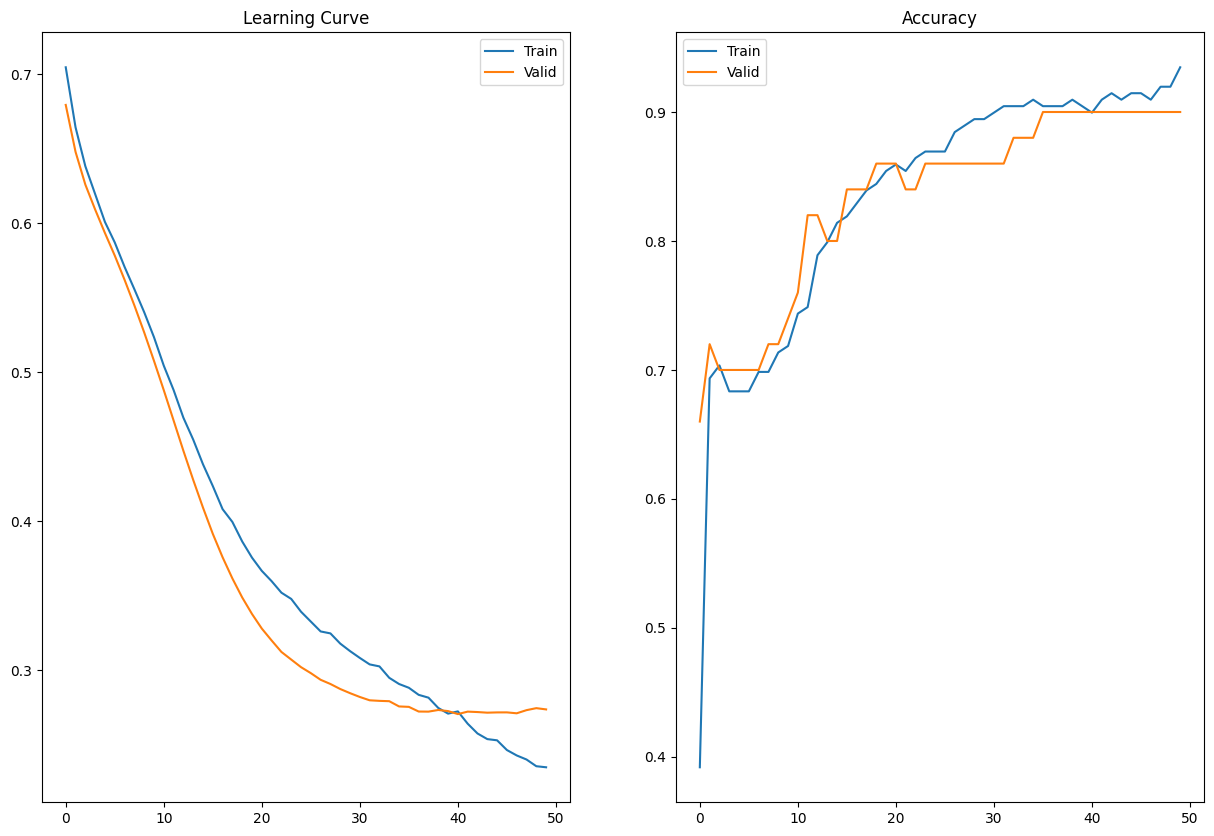

In [169]:
fig, ax = plt.subplots(1, 2, figsize=(15, 10))

ax[0].plot(train_loss_hist, label='Train')
ax[0].plot(valid_loss_hist, label='Valid')
ax[0].set_title('Learning Curve')

ax[1].plot(train_acc_hist, label='Train')
ax[1].plot(valid_acc_hist, label='Valid')
ax[1].set_title('Accuracy')

ax[0].legend()
ax[1].legend()

In [174]:
print(f'Accuracy: {valid_acc_hist[-1].item()}')

Accuracy: 0.8999999761581421


## Save the model

In [170]:
torch.save(model, 'model.pth')

In [171]:
torch.load('model.pth')

Sequential(
  (0): Linear(in_features=12, out_features=64, bias=True)
  (1): ReLU()
  (2): Linear(in_features=64, out_features=32, bias=True)
  (3): ReLU()
  (4): Linear(in_features=32, out_features=1, bias=True)
  (5): Sigmoid()
)